# Map tilt fields for norminal examples of both sources

In [3]:
import pyproj
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import station_positions
import matplotlib
import rasterio

import vmod.source
import vmod.data

matplotlib.rc('pdf', fonttype=42)

plt.style.use("/home/mchristo/proj/libmsc/style/msc.mplstyle")

## Yang vertical deformation and tilt field

In [4]:
tiltm = vmod.data.tilt.Tilt()
tiltm.set_delta(1)

x = np.linspace(-4e3, 4e3, 200)
y = np.linspace(-4e3, 4e3, 200)
gx, gy = np.meshgrid(x, y)
gx = gx.flatten()
gy = gy.flatten()
tiltm.add_xs(gx)
tiltm.add_ys(gy)
tiltm.add_dx(np.zeros_like(gx))
tiltm.add_dy(np.zeros_like(gy))


gnss = vmod.data.gnss.Gnss()
gnss.add_xs(gx)
gnss.add_ys(gy)
gnss.add_ux(np.zeros_like(gx))
gnss.add_uy(np.zeros_like(gy))
gnss.add_uz(np.zeros_like(gx))

In [5]:
# The order of the parameters are xcen, ycen, depth, pressure, semimajor axis, semiminor axis, strike and dip angles in degrees
x0 = [0, 0, 3e3, -1.7e7, 1e3, 2.5e2, 0, 90]


# The order of the parameters are xcen, ycen, depth, and change of volume
yang_disp = vmod.source.yang.Yang(gnss)
_, _, uzyang= yang_disp.forward(x0, unravel=False)

yang_tilt = vmod.source.yang.Yang(tiltm)
dxyang, dyyang = yang_tilt.forward(x0, unravel=False)

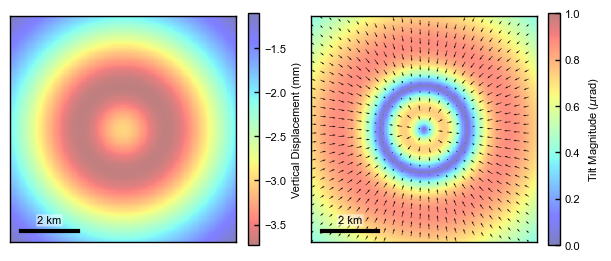

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(6,2.5), constrained_layout=True)

ds = 64

# Yang vertical
im = axs[0].pcolormesh(x, y, 1e3*uzyang.reshape((len(x), len(y))), cmap="jet_r", alpha=.5, linewidth=0, rasterized=True)
#axs[0].quiver(gx[::ds], gy[::ds], dxmogi[::ds], dymogi[::ds])
axs[0].set(xticks=[], yticks=[])
axs[0].set_aspect("equal")

# Add colorbar
fig.colorbar(im, ax=axs[0], label="Vertical Displacement (mm)")

# Scale bar
xmin, xmax = axs[0].get_xlim()
ymin, ymax = axs[0].get_ylim()
bly = ymin + (0.05*(ymax-ymin))
blx = xmin + (0.05*(xmax-xmin))

for i in [0, 1]:
    axs[i].plot([blx, blx+2e3], [bly, bly], linewidth=3)
    
    axs[i].text(
        blx+1e3,
        bly+200,
        "2 km",
        fontsize=8,
        horizontalalignment="center",
        verticalalignment="bottom",
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1', alpha=0.5)
    )

# Add label
alabel = axs[0].annotate(
    "a",
    (.025,.94),
    xycoords="axes fraction",
    fontsize=8,
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1', alpha=0.5)
)


# Yang
im = axs[1].pcolormesh(x, y, 1e6*np.sqrt(dxyang**2 + dyyang**2).reshape((len(x), len(y))), cmap="jet", alpha=.5, vmin=0, vmax=1, linewidth=0, rasterized=True)
axs[1].quiver(gx[::ds], gy[::ds], dxyang[::ds], dyyang[::ds])
axs[1].set(xticks=[], yticks=[])
axs[1].set_aspect("equal")

# Add colorbar
fig.colorbar(im, ax=axs[1], label="Tilt Magnitude ($\\mu$rad)")

# Add label
blabel = axs[1].annotate(
    "b",
    (.025,.94),
    xycoords="axes fraction",
    fontsize=8,
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1', alpha=0.5)
)


fig.savefig("figs/yang_tilt.pdf", bbox_inches="tight")

alabel.remove()
blabel.remove()

fig.savefig("figs/png/yang_tilt.png", dpi=300, bbox_inches="tight")